In [29]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import random

In [18]:
train = pd.read_csv('mnistTrain.csv', header = None)
test = pd.read_csv('mnistTest.csv', header = None)

In [19]:
train = train.loc[train[64].isin([7,8])].reset_index(drop=True)
test = test.loc[test[64].isin([7,8])].reset_index(drop=True)

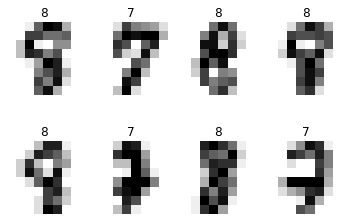

In [21]:
for index, row in train.head(8).iterrows():
    image = []
    for i in range(8):
        image.append(row[i*8:(i+1)*8])
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % row[64])

In [22]:
testTarget = test.iloc[:,-1]
testImage = test.iloc[:,0:-1]
trainTarget = train.iloc[:,-1]
trainImage = train.iloc[:,0:-1]

In [23]:
ink = trainImage.sum(axis=1) 

In [24]:
ink = ink - ink.min()
ink = ink/ink.max()

In [25]:
asymmetry = pd.Series()

In [26]:
for index, row in trainImage.iterrows():
    asym=0
    for i in range(4):
        asym+=abs(row[i]-row[7-i])
    asymmetry.at[index]=asym

In [27]:
asymmetry = asymmetry - asymmetry.min()
asymmetry = asymmetry/asymmetry.max()
trainProc = pd.concat([ink, asymmetry,trainTarget], axis=1)
trainProc.columns = ['ink','asymmetry','target']
trainProc.head()

,ink,asymmetry,target
0,0.560694,0.50,8
1,0.369942,0.34,7
2,0.531792,0.30,8
3,0.572254,0.42,8
4,0.312139,0.50,8


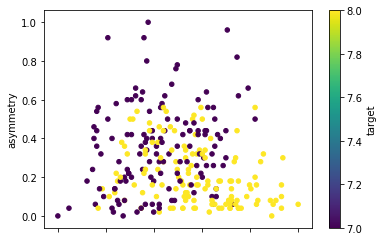

In [28]:
trainProc.plot(x ='ink', y='asymmetry',c='target',colormap='viridis' ,kind = 'scatter')	

In [ ]:
w =[random.randrange(-1,1),random.randrange(-1,1)]
for i in range(100):
    